In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from matplotlib import pyplot
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import * 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Imported Successfully')

Imported Successfully


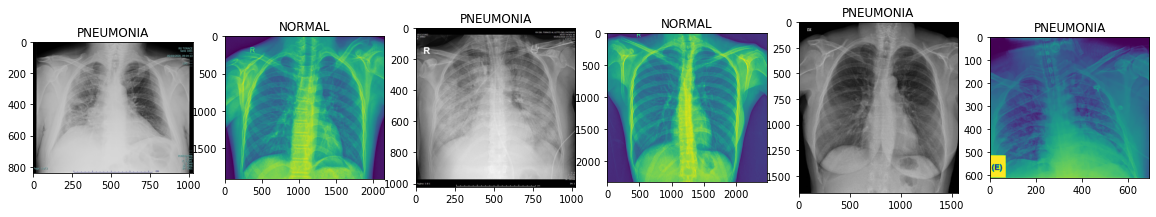

In [75]:
img_folder='covid19-xray-dataset-train-test-sets/train'
plt.figure(figsize=(20,20))
for i in range(6):
 class_ = random.choice(os.listdir(img_folder))
 class_path= os.path.join(img_folder, class_)
 file=random.choice(os.listdir(class_path))
 image_path= os.path.join(class_path,file)
 img= mpimg.imread(image_path)
 ax=plt.subplot(1,6,(i+1))
 plt.imshow(img)
 ax.title.set_text(class_)

In [76]:
def create_dataset(img_folders,IMG_WIDTH,IMG_HEIGHT):
    img_data_array=[]
    class_name=[]
    n=0
    for dirname, _, filenames in os.walk(img_folders):
        for filename in filenames:
            img_path= os.path.join(dirname, filename)
            #read the image
            image = cv2.imread(img_path)
            # BGR is converted to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_WIDTH,IMG_HEIGHT))
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_=str(dirname).split("/")[-1]
            class_name.append(class_)
            n+=1
    return img_data_array, class_name,n

In [77]:
IMG_WIDTH= 224
IMG_HEIGHT=224
train_path='covid19-xray-dataset-train-test-sets/train/'
test_path='covid19-xray-dataset-train-test-sets/test/'
X_train,Y_train,num_train = create_dataset(train_path,IMG_WIDTH,IMG_HEIGHT)
X_test,Y_test,num_test = create_dataset(test_path,IMG_WIDTH,IMG_HEIGHT)

In [78]:
print(Y_train)

['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',

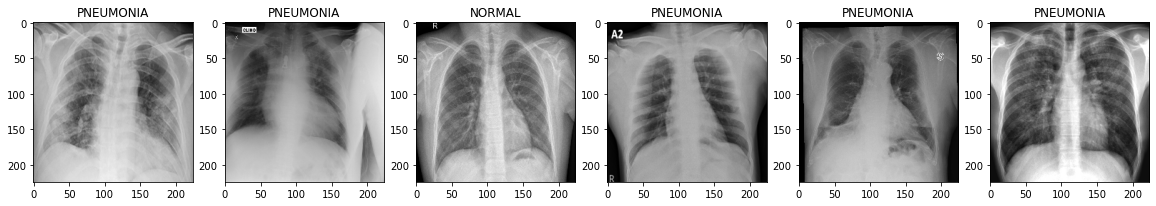

In [79]:
plt.figure(figsize=(20,20))
for i in range(6):
    random_num = random.randint(0,num_img)
    ax=plt.subplot(1,6,(i+1))
    plt.imshow(train_img[random_num])
    ax.title.set_text(train_target[random_num])

In [80]:
target_dict = {k: v for v, k in enumerate(np.unique(train_target))}
print(target_dict)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [81]:
Y_train = [target_dict[Y_train[i]] for i in range(len(Y_train))]
Y_train = np.array(Y_train)
X_train = np.array(X_train)
print(X_train)
print(Y_train)

[[[[0.33333334 0.33333334 0.33333334]
   [0.29411766 0.29411766 0.29411766]
   [0.29411766 0.29411766 0.29411766]
   ...
   [0.3019608  0.3019608  0.3019608 ]
   [0.2901961  0.2901961  0.2901961 ]
   [0.28235295 0.28235295 0.28235295]]

  [[0.30980393 0.30980393 0.30980393]
   [0.30980393 0.30980393 0.30980393]
   [0.31764707 0.31764707 0.31764707]
   ...
   [0.30980393 0.30980393 0.30980393]
   [0.3019608  0.3019608  0.3019608 ]
   [0.29411766 0.29411766 0.29411766]]

  [[0.33333334 0.33333334 0.33333334]
   [0.29411766 0.29411766 0.29411766]
   [0.3137255  0.3137255  0.3137255 ]
   ...
   [0.31764707 0.31764707 0.31764707]
   [0.30588236 0.30588236 0.30588236]
   [0.29803923 0.29803923 0.29803923]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

In [82]:
Y_test = [target_dict[Y_test[i]] for i in range(len(Y_test))]
Y_test = np.array(Y_test)
X_test = np.array(X_test)
print(X_test)
print(Y_test)

[[[[0.27450982 0.27450982 0.27450982]
   [0.30588236 0.30588236 0.30588236]
   [0.32941177 0.32941177 0.32941177]
   ...
   [0.10588235 0.10588235 0.10588235]
   [0.15294118 0.15294118 0.15294118]
   [0.23529412 0.23529412 0.23529412]]

  [[0.2784314  0.2784314  0.2784314 ]
   [0.30588236 0.30588236 0.30588236]
   [0.3254902  0.3254902  0.3254902 ]
   ...
   [0.10588235 0.10588235 0.10588235]
   [0.15686275 0.15686275 0.15686275]
   [0.23137255 0.23137255 0.23137255]]

  [[0.2784314  0.2784314  0.2784314 ]
   [0.29803923 0.29803923 0.29803923]
   [0.32941177 0.32941177 0.32941177]
   ...
   [0.10980392 0.10980392 0.10980392]
   [0.15686275 0.15686275 0.15686275]
   [0.23137255 0.23137255 0.23137255]]

  ...

  [[0.09803922 0.09803922 0.09803922]
   [0.07843138 0.07843138 0.07843138]
   [0.07843138 0.07843138 0.07843138]
   ...
   [0.09803922 0.09803922 0.09803922]
   [0.10196079 0.10196079 0.10196079]
   [0.10196079 0.10196079 0.10196079]]

  [[0.08627451 0.08627451 0.08627451]
   [0.0

In [83]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(148, 224, 224, 3)
(40, 224, 224, 3)
(148,)
(40,)


In [84]:
def model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    return model

In [85]:
mod = model()
mod.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)           

In [86]:
mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = mod.fit(X_train, Y_train, epochs=30,batch_size=32, 
                    validation_split=0.33,shuffle=True)

Epoch 1/30
4/4 [==============================] - 11s 2s/step - loss: 2.7297 - accuracy: 0.7797 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 7s 2s/step - loss: 11.9933 - accuracy: 0.4948 - val_loss: 12.8257 - val_accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 7s 2s/step - loss: 1.4211 - accuracy: 0.8179 - val_loss: 0.1023 - val_accuracy: 0.9796
Epoch 4/30
4/4 [==============================] - 7s 2s/step - loss: 0.2643 - accuracy: 0.9228 - val_loss: 6.7031 - val_accuracy: 0.0204
Epoch 5/30
4/4 [==============================] - 7s 2s/step - loss: 0.7287 - accuracy: 0.8885 - val_loss: 0.0886 - val_accuracy: 0.9796
Epoch 6/30
4/4 [==============================] - 7s 2s/step - loss: 0.3361 - accuracy: 0.8639 - val_loss: 0.2059 - val_accuracy: 0.9388
Epoch 7/30
4/4 [==============================] - 7s 2s/step - loss: 0.1255 - accuracy: 0.9433 - val_loss: 0.3109 - val_accuracy: 0.9184
Epoch 8/30
4/4 [==============

In [87]:
test_loss, test_acc = mod.evaluate(X_test,  Y_test, verbose=1)

2/2 [==============================] - 1s 153ms/step - loss: 0.0543 - accuracy: 0.9750


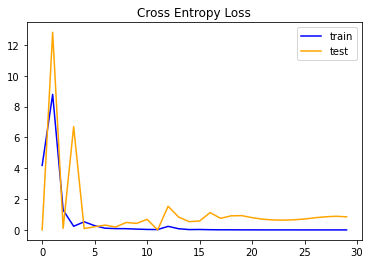

<Figure size 720x720 with 0 Axes>

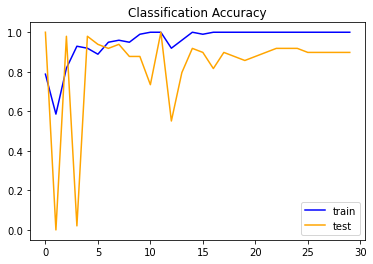

<Figure size 720x720 with 0 Axes>

In [88]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
pyplot.show()
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
# save plot to file
pyplot.show()
pyplot.close()

In [89]:
pred = mod.predict(X_test,batch_size=32)

label=[]
for i in range(len(pred)):
    if(pred[i][0]>pred[i][1]):
        label.append(0)
    else:
        label.append(1)
#label
#Performance Evaluation - Accuracy, Classification Report & Confusion Matrix
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(label, Y_test), '\n')

#precision, recall report
print ('Classification Report :\n\n' ,classification_report(label, Y_test))

Accuracy Score :  0.975 

Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

